# INSY695 Group Project

## Step 3: Data Pre-Processing 



In [1]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')


import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier


import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
               

## 2.1 <b>Import Dataset</b>

In [2]:
path= "/Users/mesaye/dataexpo.csv"
data = pd.read_csv(path)

## 2.2 <b>Check How Data Look Like</b>

In [3]:
data.shape # 52610 rows, 25 columns

(52610, 25)

In [4]:
data.head()

,gameID,hoa,won,settledIn,headCoach,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,startRinkSide,...,giveaways,missedShots,penalties,wonFaceoffs,teamID,timeOnIce,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,goalieReplacement
0,2016020045,away,False,REG,Dave Hakstol,2.00,1.33,0.67,50.9,left,...,6.0,4.0,1.0,10.0,4.0,330.28,280.46,18.52,31.30,Yes
1,2016020045,home,True,REG,Joel Quenneville,2.67,1.00,0.67,49.1,left,...,7.0,0.0,1.0,12.0,16.0,327.11,278.93,25.04,23.15,No
2,2017020812,away,True,OT,Randy Carlyle,2.00,1.00,0.33,43.8,right,...,2.0,6.0,1.0,11.0,24.0,334.07,293.20,9.48,31.39,No
3,2017020812,home,False,OT,Phil Housley,2.67,0.67,0.33,56.2,right,...,0.0,3.0,3.0,9.0,7.0,333.07,296.11,25.11,11.85,No
4,2015020314,away,True,REG,Patrick Roy,3.00,1.00,0.33,45.7,left,...,7.0,3.0,2.0,7.0,21.0,328.89,281.57,17.78,29.54,No


## 2.3 Check Missing Values and Data Imputation

In [5]:
data.isnull().sum()

gameID                        0
hoa                           0
won                           0
settledIn                     0
headCoach                    28
pim                           8
powerPlayOpportunities        8
powerPlayGoals                8
faceOffWinPercentage      22148
startRinkSide              2392
shots                         0
goals                         0
takeaways                     0
hits                          0
blockedShots                  0
giveaways                     0
missedShots                   0
penalties                     0
wonFaceoffs                   0
teamID                       28
timeOnIce                    28
evenTimeOnIce                28
shortHandedTimeOnIce         28
powerPlayTimeOnIce           28
goalieReplacement            35
dtype: int64

# Handling  missing values

### Check missing values

In [6]:
def missing_values(data):
    mis_val = data.isnull().sum()
    mis_val_percent = 100 * data.isnull().sum() / len(data)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={
        0: 'Missing Values',
        1: '% of Total Values'
    })
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
    print("Dataframe has " + str(data.shape[1]) + " columns.")
    print("There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    return mis_val_table_ren_columns

In [7]:
# Missing values statistics
miss_values = missing_values(data)
miss_values.head(20)

# if there is no column with missing value > 70%. thus we need to impute the missing values

Dataframe has 25 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
faceOffWinPercentage,22148,42.1
startRinkSide,2392,4.5
goalieReplacement,35,0.1
headCoach,28,0.1
teamID,28,0.1
timeOnIce,28,0.1
evenTimeOnIce,28,0.1
shortHandedTimeOnIce,28,0.1
powerPlayTimeOnIce,28,0.1
pim,8,0.0


In [8]:
# ! pip install missingno

### Nullity Matrix

The msno.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.

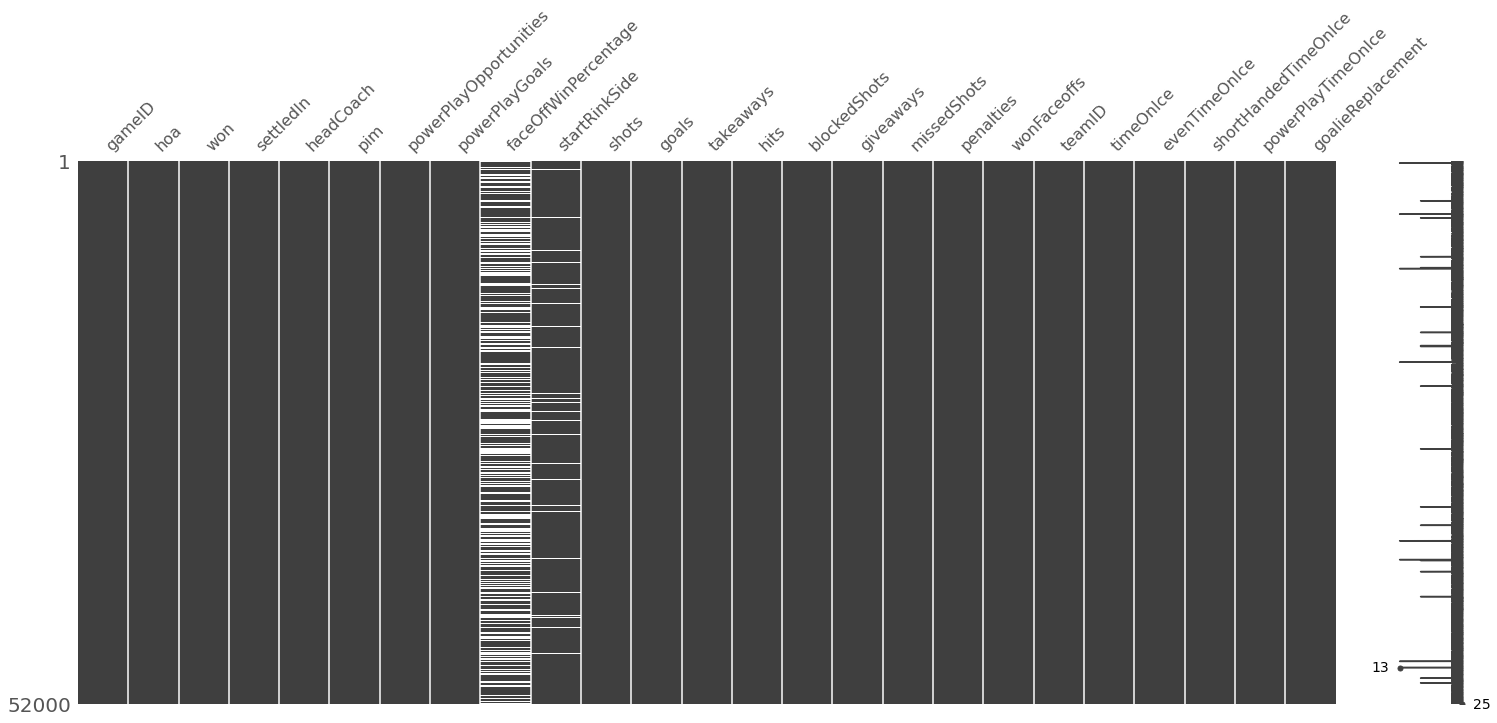

In [9]:
import missingno as msno
ax = msno.matrix(data.sample(52000))

<AxesSubplot:>

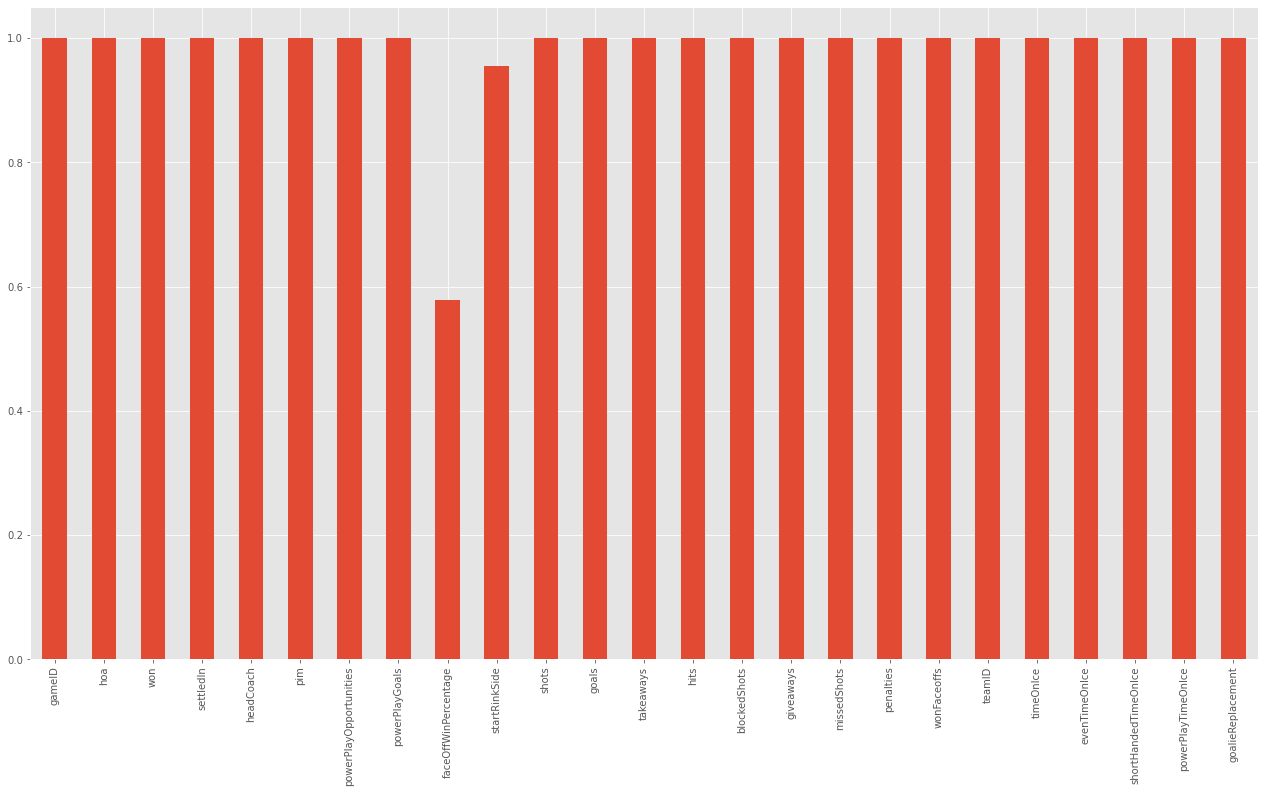

In [10]:
fig, ax = plt.subplots(figsize=(22, 12))
(1 - data.isnull().mean()).abs().plot.bar(ax=ax)

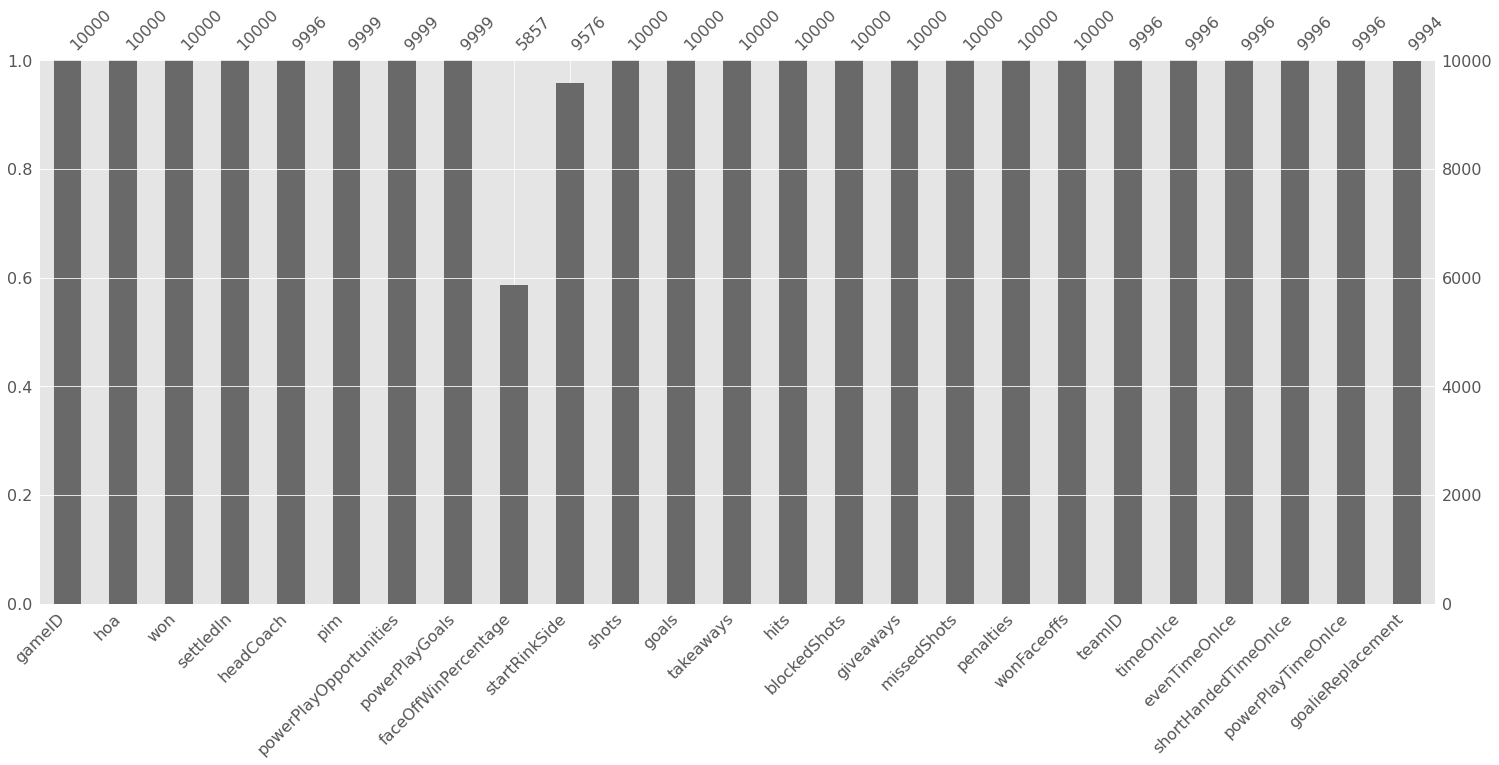

In [11]:
ax = msno.bar(data.sample(10000))


### Missingno correlation heatmap

The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another

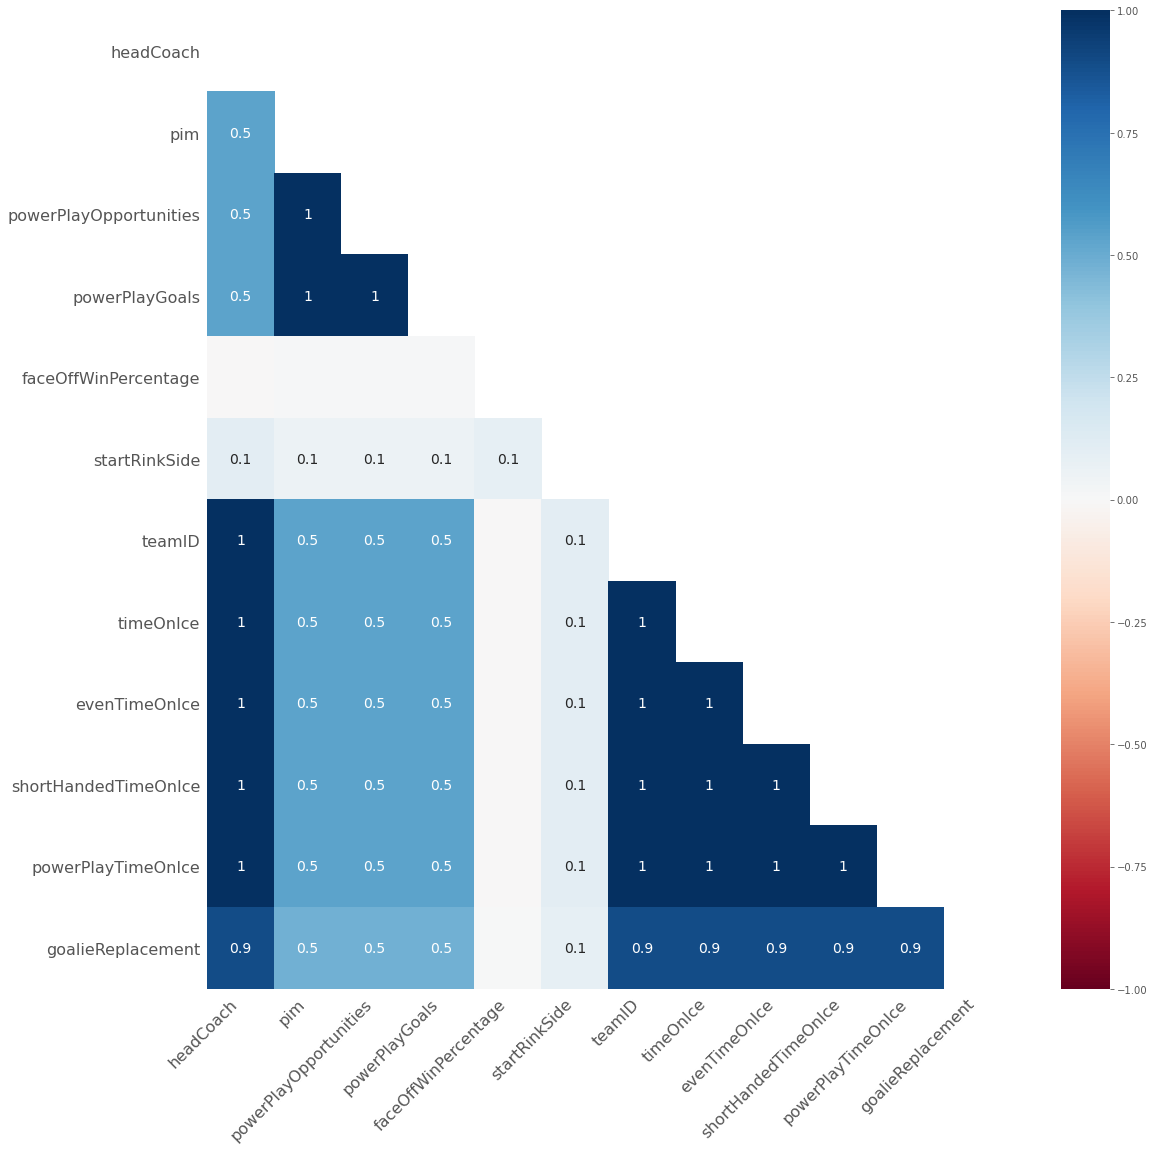

In [12]:
ax = msno.heatmap(data, figsize=(18, 18))

### Insights:

null values in head coach, goalreplacement, powerplaytimeonice, shorthandedtimeonice, eventimeonice,teamid is highly correalated with one another

null valuses in powerplaygoals,powerplayopportunities, and pim is highly correalated with one another





### Dendogram
The dendrogram shows a
fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap

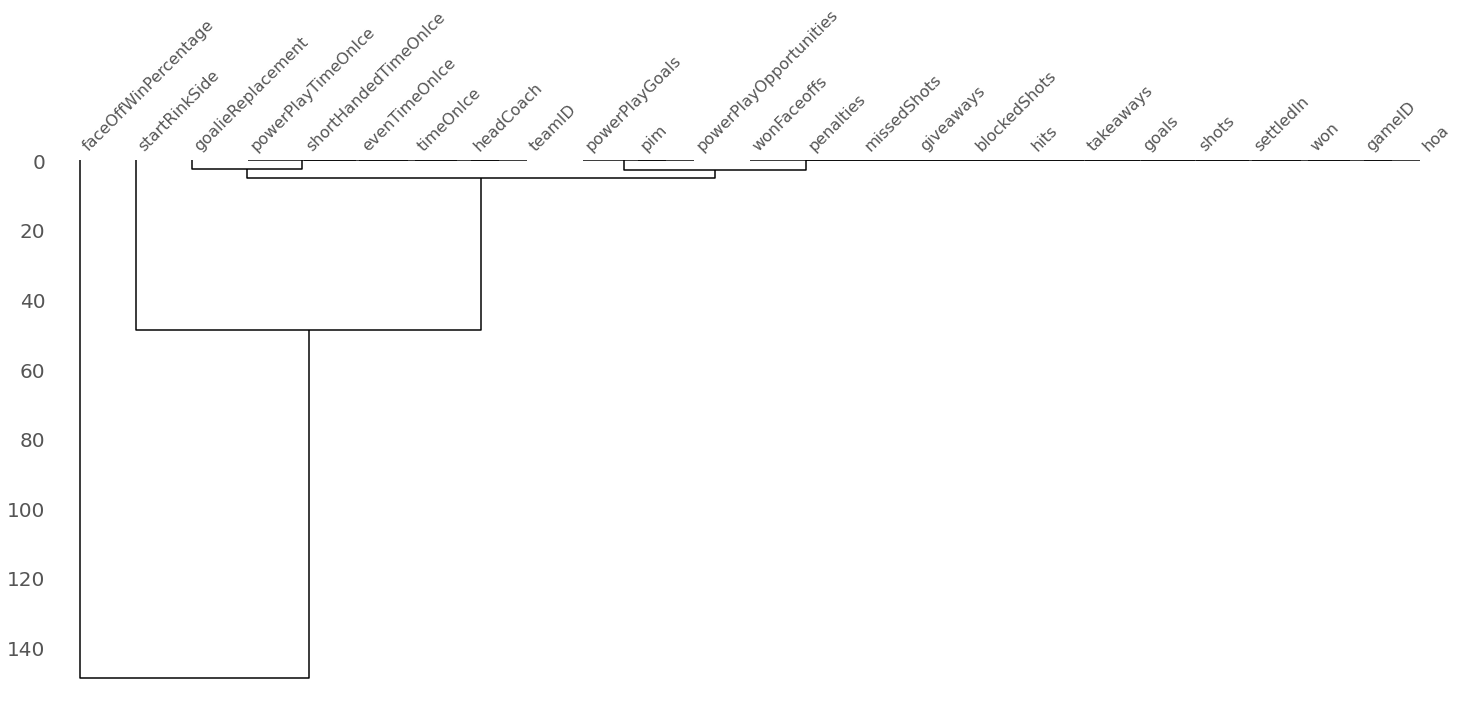

In [13]:
ax = msno.dendrogram(data)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52610 entries, 0 to 52609
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameID                  52610 non-null  int64  
 1   hoa                     52610 non-null  object 
 2   won                     52610 non-null  bool   
 3   settledIn               52610 non-null  object 
 4   headCoach               52582 non-null  object 
 5   pim                     52602 non-null  float64
 6   powerPlayOpportunities  52602 non-null  float64
 7   powerPlayGoals          52602 non-null  float64
 8   faceOffWinPercentage    30462 non-null  float64
 9   startRinkSide           50218 non-null  object 
 10  shots                   52610 non-null  float64
 11  goals                   52610 non-null  float64
 12  takeaways               52610 non-null  float64
 13  hits                    52610 non-null  float64
 14  blockedShots            52610 non-null

In [15]:
data.isnull().sum()

gameID                        0
hoa                           0
won                           0
settledIn                     0
headCoach                    28
pim                           8
powerPlayOpportunities        8
powerPlayGoals                8
faceOffWinPercentage      22148
startRinkSide              2392
shots                         0
goals                         0
takeaways                     0
hits                          0
blockedShots                  0
giveaways                     0
missedShots                   0
penalties                     0
wonFaceoffs                   0
teamID                       28
timeOnIce                    28
evenTimeOnIce                28
shortHandedTimeOnIce         28
powerPlayTimeOnIce           28
goalieReplacement            35
dtype: int64

## Fill the numerical missing values
the numerical values imputed using median value

In [16]:
data['faceOffWinPercentage'] = data['faceOffWinPercentage'].fillna(
    data['faceOffWinPercentage'].median())

data['timeOnIce'] = data['timeOnIce'].fillna(
    data['timeOnIce'].median())

data['evenTimeOnIce'] = data['evenTimeOnIce'].fillna(
    data['evenTimeOnIce'].median())

data['shortHandedTimeOnIce'] = data['shortHandedTimeOnIce'].fillna(
    data['shortHandedTimeOnIce'].median())

data['powerPlayTimeOnIce'] = data['powerPlayTimeOnIce'].fillna(
    data['powerPlayTimeOnIce'].median())

data['teamID'] = data['teamID'].fillna(
    data['teamID'].median())

data['pim'] = data['pim'].fillna(
    data['pim'].median())

data['powerPlayOpportunities'] = data['powerPlayOpportunities'].fillna(
    data['powerPlayOpportunities'].median())

data['powerPlayGoals'] = data['powerPlayGoals'].fillna(
    data['powerPlayGoals'].median())



In [17]:
data.head(10)

,gameID,hoa,won,settledIn,headCoach,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,startRinkSide,...,giveaways,missedShots,penalties,wonFaceoffs,teamID,timeOnIce,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,goalieReplacement
0,2016020045,away,False,REG,Dave Hakstol,2.00,1.33,0.67,50.9,left,...,6.0,4.0,1.0,10.0,4.0,330.28,280.46,18.52,31.30,Yes
1,2016020045,home,True,REG,Joel Quenneville,2.67,1.00,0.67,49.1,left,...,7.0,0.0,1.0,12.0,16.0,327.11,278.93,25.04,23.15,No
2,2017020812,away,True,OT,Randy Carlyle,2.00,1.00,0.33,43.8,right,...,2.0,6.0,1.0,11.0,24.0,334.07,293.20,9.48,31.39,No
3,2017020812,home,False,OT,Phil Housley,2.67,0.67,0.33,56.2,right,...,0.0,3.0,3.0,9.0,7.0,333.07,296.11,25.11,11.85,No
4,2015020314,away,True,REG,Patrick Roy,3.00,1.00,0.33,45.7,left,...,7.0,3.0,2.0,7.0,21.0,328.89,281.57,17.78,29.54,No
5,2015020314,home,False,REG,Paul Maurice,3.67,0.67,0.00,54.3,left,...,5.0,8.0,1.0,11.0,52.0,328.91,283.06,23.63,22.22,No
6,2015020849,away,False,REG,Paul Maurice,3.33,1.33,0.00,31.4,left,...,2.0,3.0,1.0,5.0,52.0,324.78,254.35,35.70,34.72,No
7,2015020849,home,True,REG,Bill Peters,2.67,1.67,0.67,68.6,left,...,2.0,3.0,3.0,12.0,12.0,324.48,252.07,27.78,44.63,No
8,2017020586,away,False,REG,Glen Gulutzan,6.33,1.00,0.00,54.7,right,...,4.0,2.0,5.0,7.0,20.0,324.72,261.76,38.15,24.81,No
9,2017020586,home,True,REG,Randy Carlyle,4.33,2.00,0.33,45.3,right,...,5.0,6.0,3.0,11.0,24.0,326.54,259.31,19.85,47.37,No


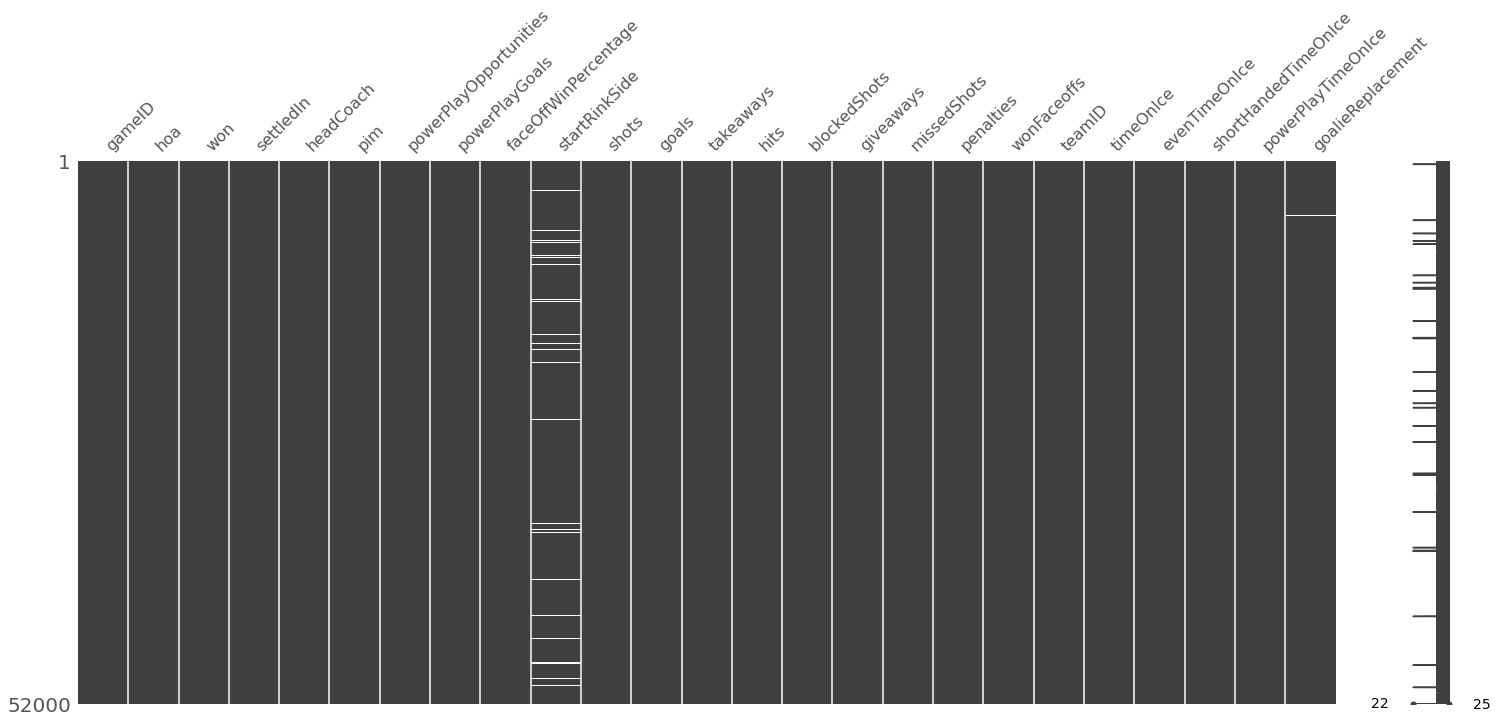

In [18]:
ax = msno.matrix(data.sample(52000))

In [19]:
data.headCoach.head(5)

0        Dave Hakstol
1    Joel Quenneville
2       Randy Carlyle
3        Phil Housley
4         Patrick Roy
Name: headCoach, dtype: object

In [20]:
# copy the dataframe
df= data.copy()

In [21]:
df.isnull().sum()

gameID                       0
hoa                          0
won                          0
settledIn                    0
headCoach                   28
pim                          0
powerPlayOpportunities       0
powerPlayGoals               0
faceOffWinPercentage         0
startRinkSide             2392
shots                        0
goals                        0
takeaways                    0
hits                         0
blockedShots                 0
giveaways                    0
missedShots                  0
penalties                    0
wonFaceoffs                  0
teamID                       0
timeOnIce                    0
evenTimeOnIce                0
shortHandedTimeOnIce         0
powerPlayTimeOnIce           0
goalieReplacement           35
dtype: int64

In [22]:
# fill the column with missing values less than 4.5% with its own most frequent value
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))



In [23]:
df.isnull().sum()

gameID                    0
hoa                       0
won                       0
settledIn                 0
headCoach                 0
pim                       0
powerPlayOpportunities    0
powerPlayGoals            0
faceOffWinPercentage      0
startRinkSide             0
shots                     0
goals                     0
takeaways                 0
hits                      0
blockedShots              0
giveaways                 0
missedShots               0
penalties                 0
wonFaceoffs               0
teamID                    0
timeOnIce                 0
evenTimeOnIce             0
shortHandedTimeOnIce      0
powerPlayTimeOnIce        0
goalieReplacement         0
dtype: int64

In [24]:
df.head(10)

,gameID,hoa,won,settledIn,headCoach,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,startRinkSide,...,giveaways,missedShots,penalties,wonFaceoffs,teamID,timeOnIce,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,goalieReplacement
0,2016020045,away,False,REG,Dave Hakstol,2.00,1.33,0.67,50.9,left,...,6.0,4.0,1.0,10.0,4.0,330.28,280.46,18.52,31.30,Yes
1,2016020045,home,True,REG,Joel Quenneville,2.67,1.00,0.67,49.1,left,...,7.0,0.0,1.0,12.0,16.0,327.11,278.93,25.04,23.15,No
2,2017020812,away,True,OT,Randy Carlyle,2.00,1.00,0.33,43.8,right,...,2.0,6.0,1.0,11.0,24.0,334.07,293.20,9.48,31.39,No
3,2017020812,home,False,OT,Phil Housley,2.67,0.67,0.33,56.2,right,...,0.0,3.0,3.0,9.0,7.0,333.07,296.11,25.11,11.85,No
4,2015020314,away,True,REG,Patrick Roy,3.00,1.00,0.33,45.7,left,...,7.0,3.0,2.0,7.0,21.0,328.89,281.57,17.78,29.54,No
5,2015020314,home,False,REG,Paul Maurice,3.67,0.67,0.00,54.3,left,...,5.0,8.0,1.0,11.0,52.0,328.91,283.06,23.63,22.22,No
6,2015020849,away,False,REG,Paul Maurice,3.33,1.33,0.00,31.4,left,...,2.0,3.0,1.0,5.0,52.0,324.78,254.35,35.70,34.72,No
7,2015020849,home,True,REG,Bill Peters,2.67,1.67,0.67,68.6,left,...,2.0,3.0,3.0,12.0,12.0,324.48,252.07,27.78,44.63,No
8,2017020586,away,False,REG,Glen Gulutzan,6.33,1.00,0.00,54.7,right,...,4.0,2.0,5.0,7.0,20.0,324.72,261.76,38.15,24.81,No
9,2017020586,home,True,REG,Randy Carlyle,4.33,2.00,0.33,45.3,right,...,5.0,6.0,3.0,11.0,24.0,326.54,259.31,19.85,47.37,No


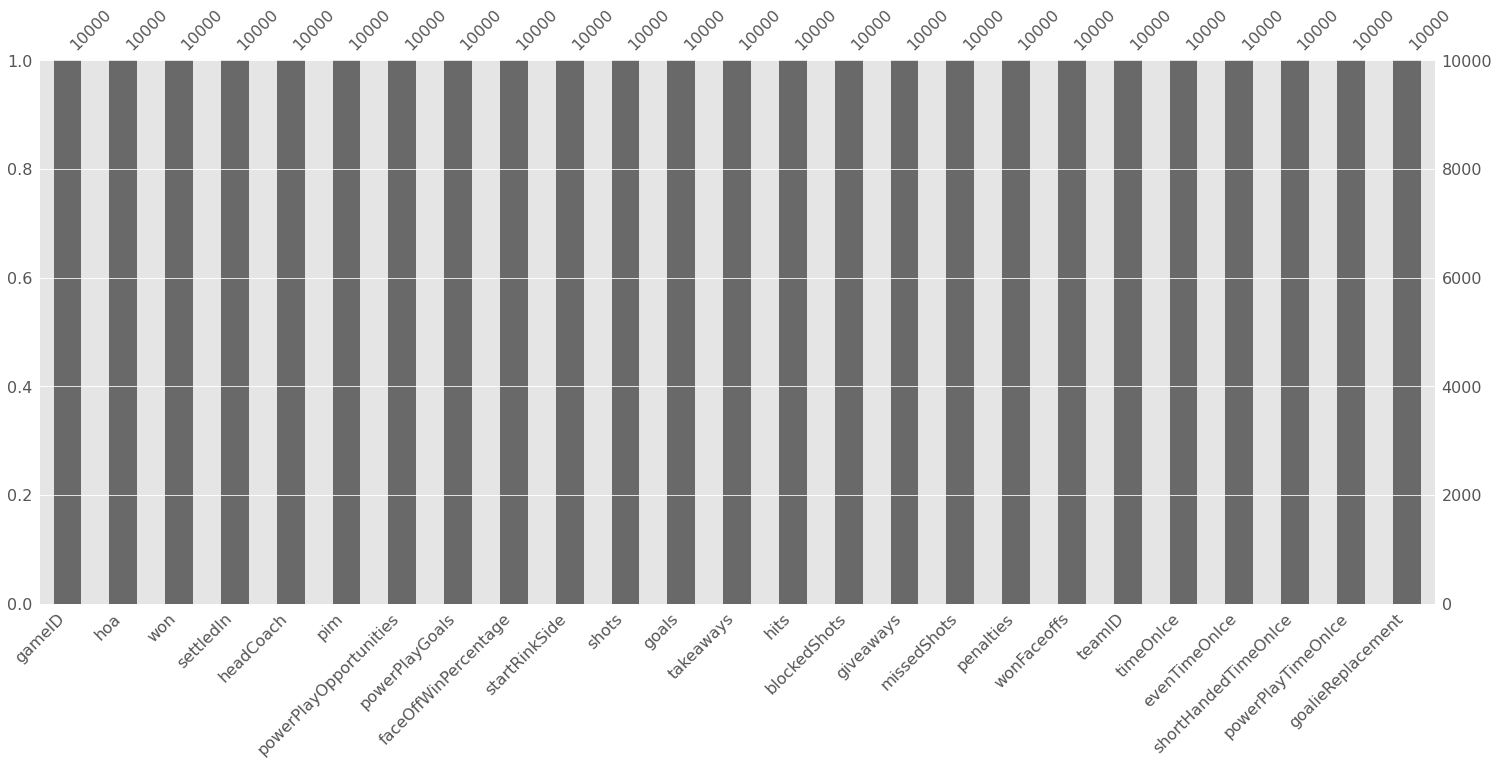

In [25]:
ax = msno.bar(df.sample(10000))



## 2.4 Create Target Variable
Convert the boolean to integer 

In [26]:
df["won"] = df["won"].astype(int)


In [27]:
df['won'].value_counts()

0    26947
1    25663
Name: won, dtype: int64

In [28]:
df.head(6)

,gameID,hoa,won,settledIn,headCoach,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,startRinkSide,...,giveaways,missedShots,penalties,wonFaceoffs,teamID,timeOnIce,evenTimeOnIce,shortHandedTimeOnIce,powerPlayTimeOnIce,goalieReplacement
0,2016020045,away,0,REG,Dave Hakstol,2.00,1.33,0.67,50.9,left,...,6.0,4.0,1.0,10.0,4.0,330.28,280.46,18.52,31.30,Yes
1,2016020045,home,1,REG,Joel Quenneville,2.67,1.00,0.67,49.1,left,...,7.0,0.0,1.0,12.0,16.0,327.11,278.93,25.04,23.15,No
2,2017020812,away,1,OT,Randy Carlyle,2.00,1.00,0.33,43.8,right,...,2.0,6.0,1.0,11.0,24.0,334.07,293.20,9.48,31.39,No
3,2017020812,home,0,OT,Phil Housley,2.67,0.67,0.33,56.2,right,...,0.0,3.0,3.0,9.0,7.0,333.07,296.11,25.11,11.85,No
4,2015020314,away,1,REG,Patrick Roy,3.00,1.00,0.33,45.7,left,...,7.0,3.0,2.0,7.0,21.0,328.89,281.57,17.78,29.54,No
5,2015020314,home,0,REG,Paul Maurice,3.67,0.67,0.00,54.3,left,...,5.0,8.0,1.0,11.0,52.0,328.91,283.06,23.63,22.22,No


## 2.5 Data Visualization 

### Correlation



In [29]:
corr = df.corr()['won'].sort_values()

# Display correlations
print('Top 10 - Positive Correlations:')
print('-----------------------------------')
print(corr.tail(10))
print('\nTop 10 - Negative Correlations:')
print('------------------------------')
print(corr.head(10))

Top 10 - Positive Correlations:
-----------------------------------
faceOffWinPercentage    0.023102
missedShots             0.025583
shortHandedTimeOnIce    0.027579
wonFaceoffs             0.029584
shots                   0.029922
takeaways               0.033402
gameID                  0.035644
powerPlayGoals          0.240932
goals                   0.267319
won                     1.000000
Name: won, dtype: float64

Top 10 - Negative Correlations:
------------------------------
timeOnIce                -0.061069
powerPlayTimeOnIce       -0.046899
pim                      -0.040195
penalties                -0.021170
evenTimeOnIce            -0.014484
teamID                   -0.000662
hits                      0.007485
powerPlayOpportunities    0.014116
blockedShots              0.017686
giveaways                 0.018816
Name: won, dtype: float64


<AxesSubplot:>

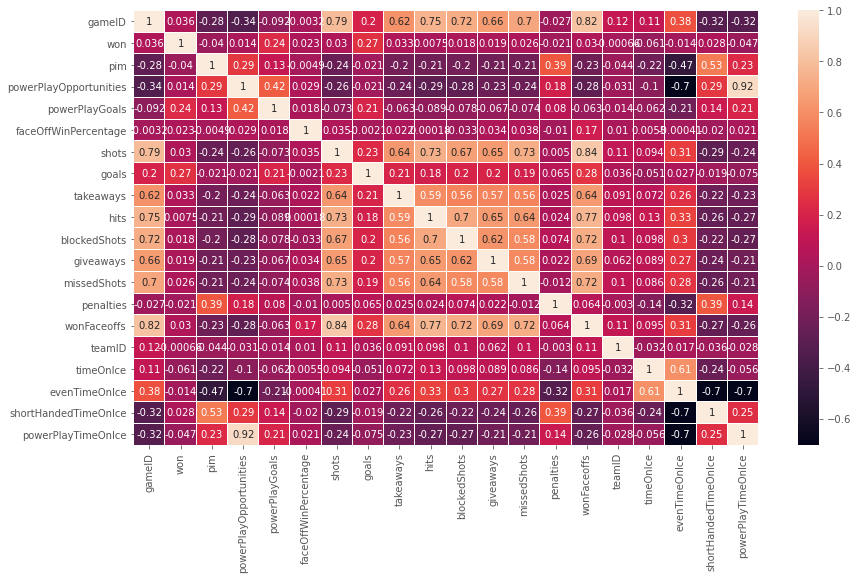

In [30]:
# check correlation using heatmap
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot = True,  linewidths=.05) 

##   Insights
* Variable with high correlation > 0.80 :

    * there is correlation between powerplaytimeonice and powerPlayOpportunities 
    * there is correlation between gameid and wonfaceoff
    * there is correlation between shots and wonfaceoff


* powerPlayOpportunities, wonFaceoffs, and gameid will dropped in data cleaning stage

   

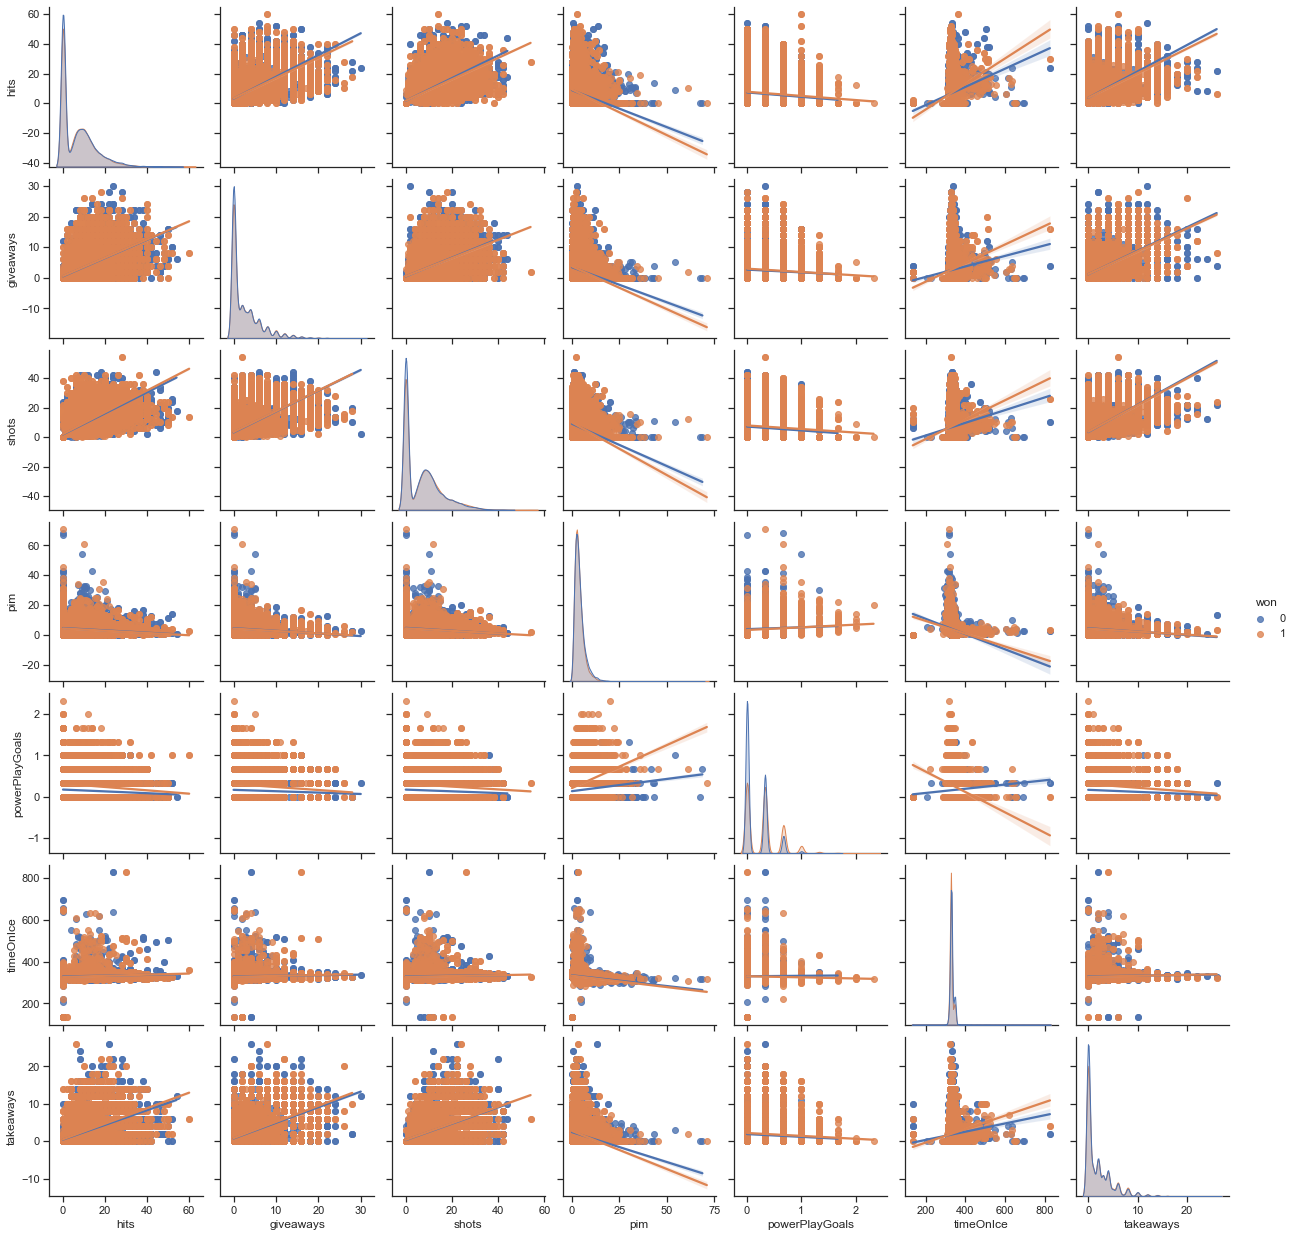

In [31]:
from seaborn import pairplot


sns.set(style="ticks")

vars= ["hits", "giveaways", "shots","pim","powerPlayGoals","timeOnIce","takeaways"]

p = pairplot(
    df, vars=vars, hue="won", kind="reg"
)



## Count of columns with specific data types


Text(0, 0.5, 'Data type')

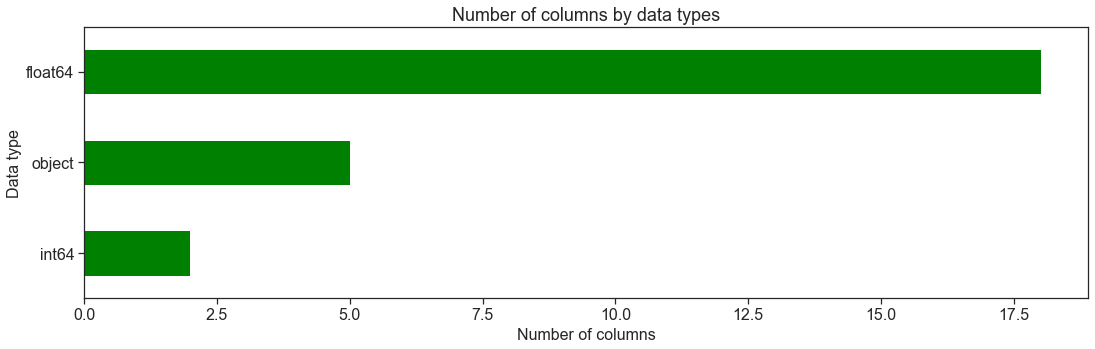

In [32]:
df.dtypes.value_counts().sort_values().plot(kind='barh',
                                            figsize=(18, 5),
                                            fontsize=16,
                                           color="green")

plt.title('Number of columns by data types', fontsize=18)
plt.xlabel('Number of columns', fontsize=16)
plt.ylabel('Data type', fontsize=16)

## Count number of categories for each object data 
We will need to deal with categorical data

In [33]:
df.select_dtypes('object').apply(pd.Series.nunique, axis=0)

hoa                    2
settledIn              3
headCoach            146
startRinkSide          2
goalieReplacement      2
dtype: int64

## Distribution of Categorical Variables


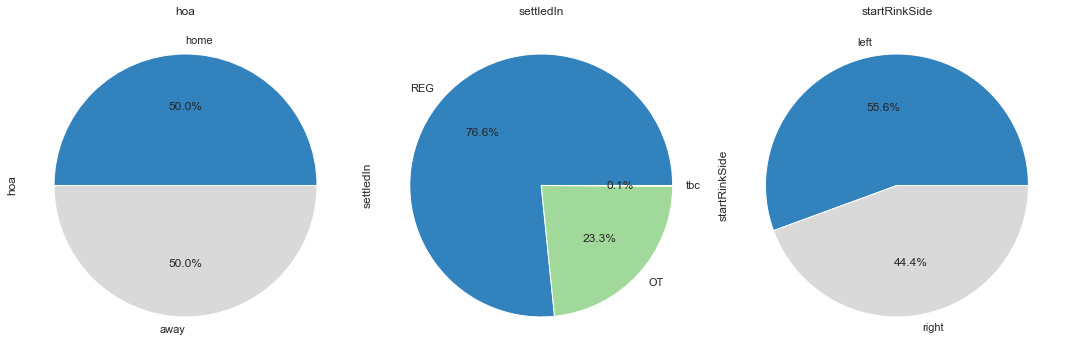

In [34]:
cat_vars = df[['hoa','settledIn','startRinkSide','goalieReplacement']]
#cat_vars.columns

fig, axes = plt.subplots(round(len(cat_vars.columns)/3), 3, figsize=(15, 10))

for i, ax in enumerate(fig.axes):
    if i < len(cat_vars.columns):
        cat_vars[cat_vars.columns[i]].value_counts().plot.pie(autopct = '%1.1f%%',ax = ax, colormap='tab20c')
        ax.set_title(cat_vars.columns[i])

fig.tight_layout();

<AxesSubplot:xlabel='goalieReplacement', ylabel='won'>

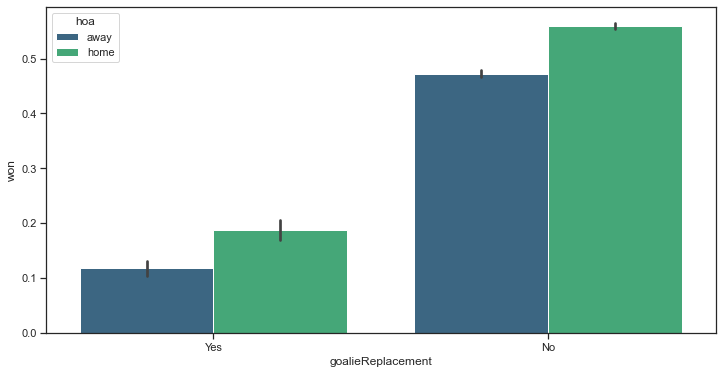

In [35]:
# examine goalie replacement 

fig, axes = plt.subplots(figsize=(12,6))
sns.barplot(x="goalieReplacement", y="won",hue="hoa", data=df,palette='viridis')



### Insight: 

* Goalie replacement can impact the outcome of the game

* Chance of winning a game is low if goalie is replaced in both game that are home or away 

<AxesSubplot:xlabel='settledIn', ylabel='won'>

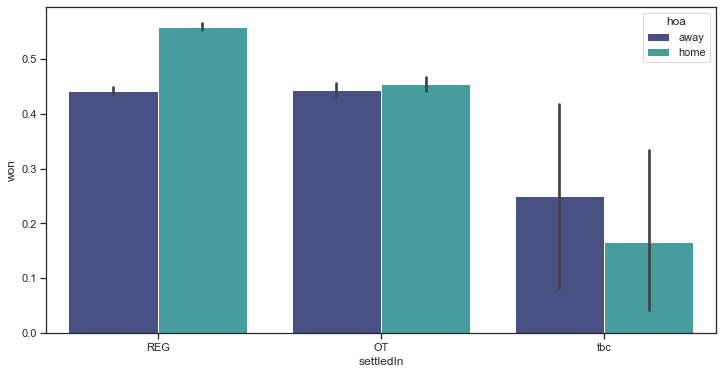

In [36]:
plt.figure(figsize=(12,6))


sns.barplot(x="settledIn", y= "won", hue="hoa", data=df,palette='mako')



### Insight: 

*  Teams playing at home have higher advantage of winning the game. However, if the game gets pushed into overtime the home team advantage drops and it is almost equal to playing a game away.



* Home teams must try to secure a win in regular period. 

<AxesSubplot:xlabel='giveaways', ylabel='goals'>

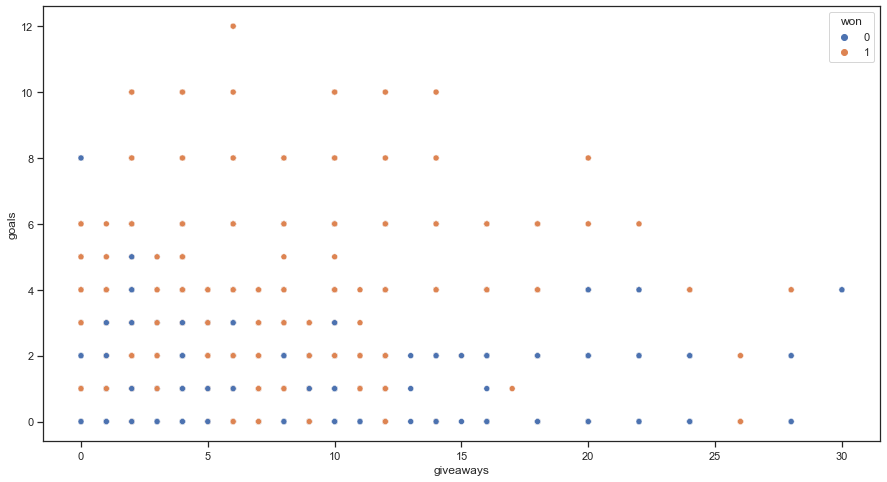

In [37]:
# examine giveaways
plt.figure(figsize=(15,8))

sns.scatterplot(data=df, x = 'giveaways', y="goals", hue = 'won')


### Insight: 

* giveaways (mistakes) are costly and teams with the most giveaways are less likely to win a game. 

Text(0.5, 0, 'Number of Games won')

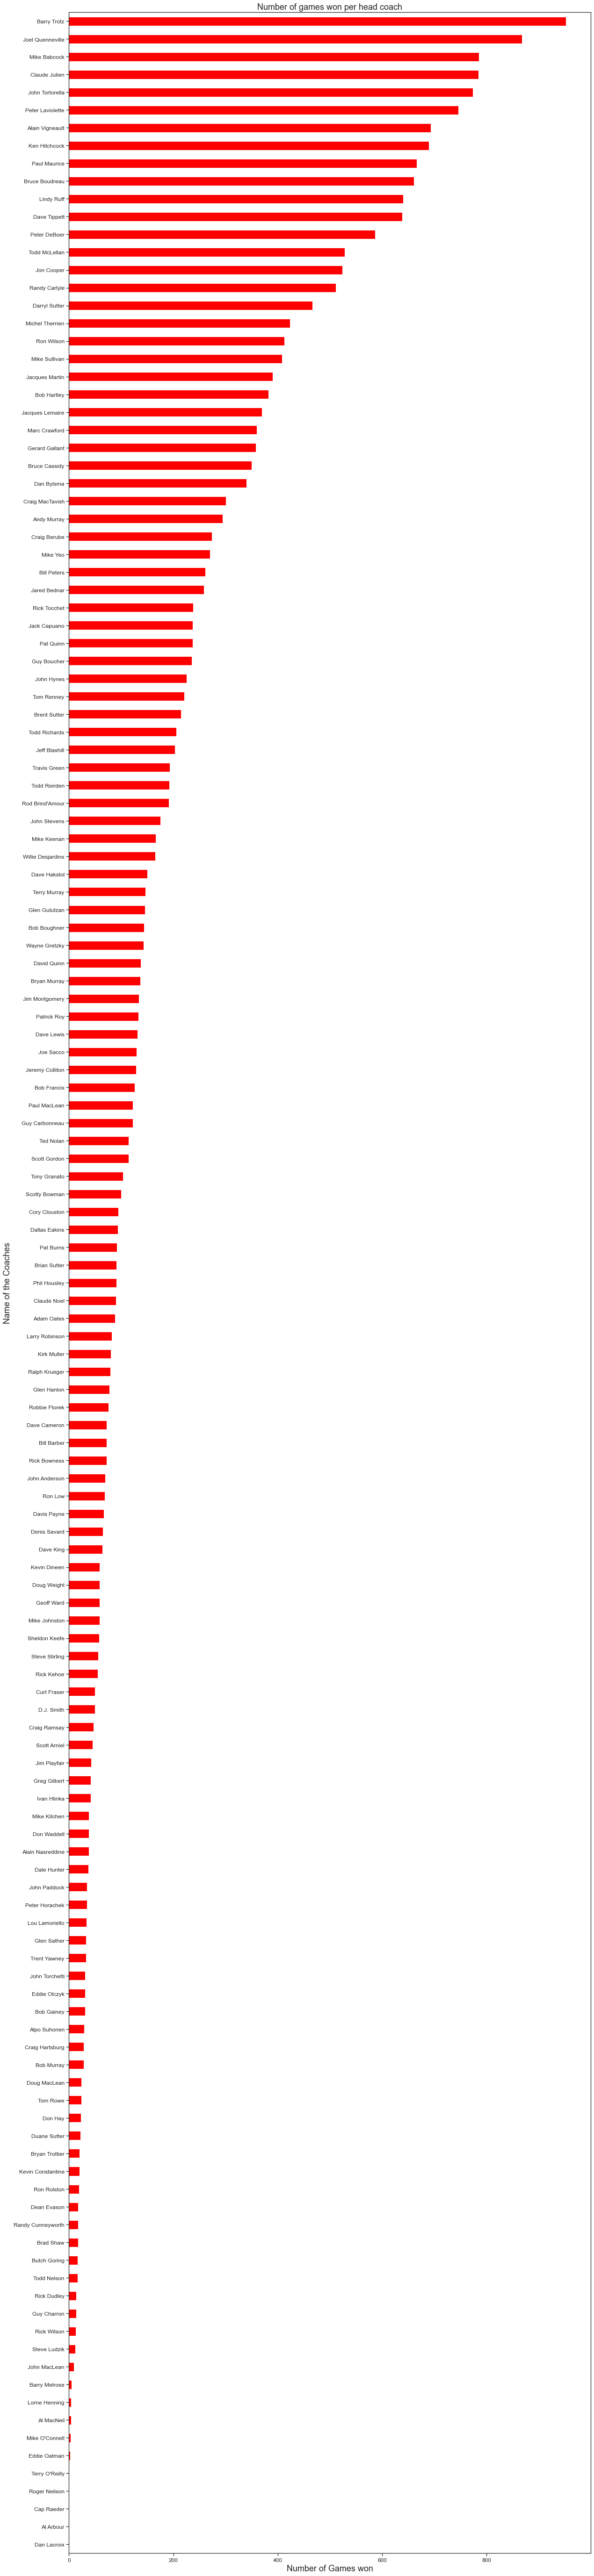

In [38]:
# examine headcoaches performance

fig = plt.figure(figsize=(20,100))
df[df['won'] == 1].groupby(
    'headCoach')['won'].count().sort_values().plot(kind='barh',
                                                       fontsize=12, color="red")

plt.title('Number of games won per head coach', fontsize=18)
plt.ylabel('Name of the Coaches', fontsize=18)
plt.xlabel('Number of Games won', fontsize=18)

<AxesSubplot:xlabel='timeOnIce', ylabel='goals'>

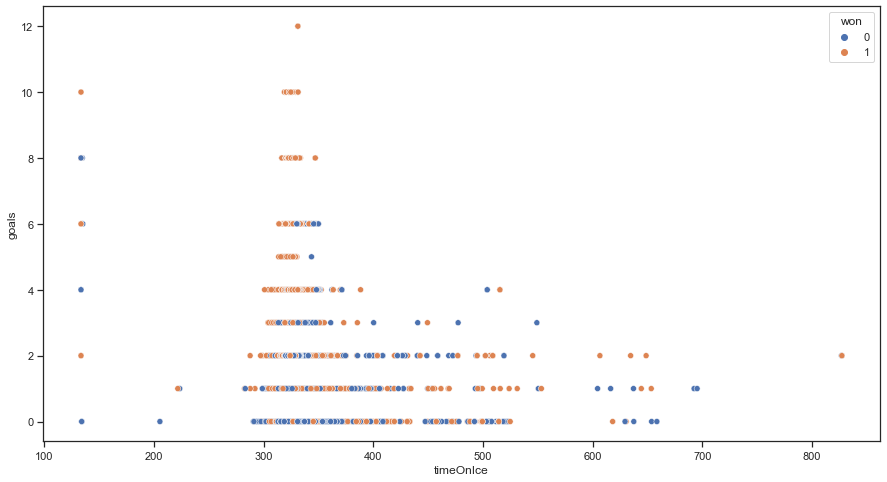

In [39]:
# check the time spent on the ice impacts the outcome of the game


plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x = 'timeOnIce', y="goals", hue = 'won')



### Insights:
* The chances of scoring in a game diminishes when a team spends more time on ice. 

## Distribution of Power Play On Ice for winning and Losing Team 

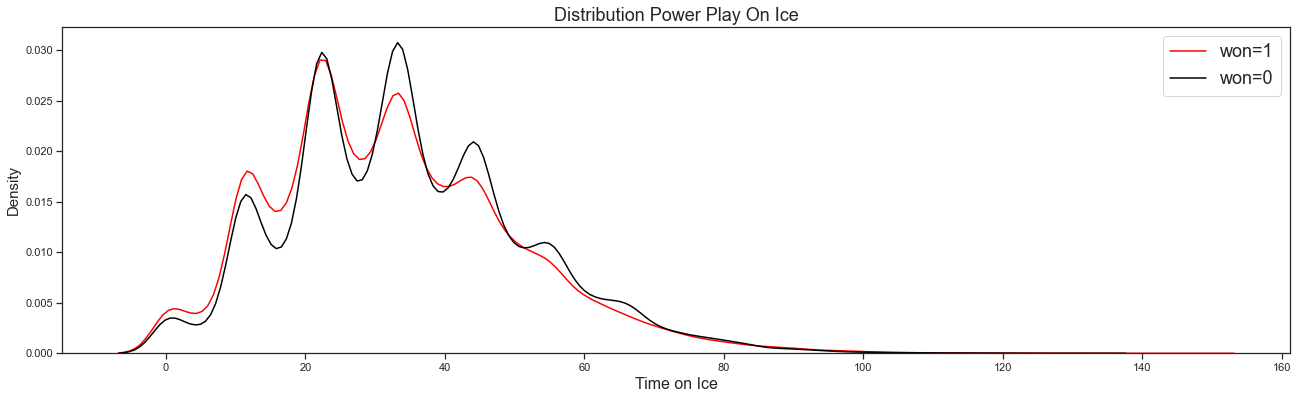

In [40]:
fig = plt.figure(figsize=(22, 6))
sns.kdeplot(df.loc[df['won'] == 1, 'powerPlayTimeOnIce'], label="won=1",color="red")
sns.kdeplot(df.loc[df['won'] == 0, 'powerPlayTimeOnIce'], label= "won=0",color="black")
plt.xlabel('Time on Ice', fontsize=16)

plt.ylabel('Density', fontsize=15)
plt.title('Distribution Power Play On Ice', fontsize=18)
plt.legend(fontsize=18)

<AxesSubplot:xlabel='faceOffWinPercentage', ylabel='goals'>

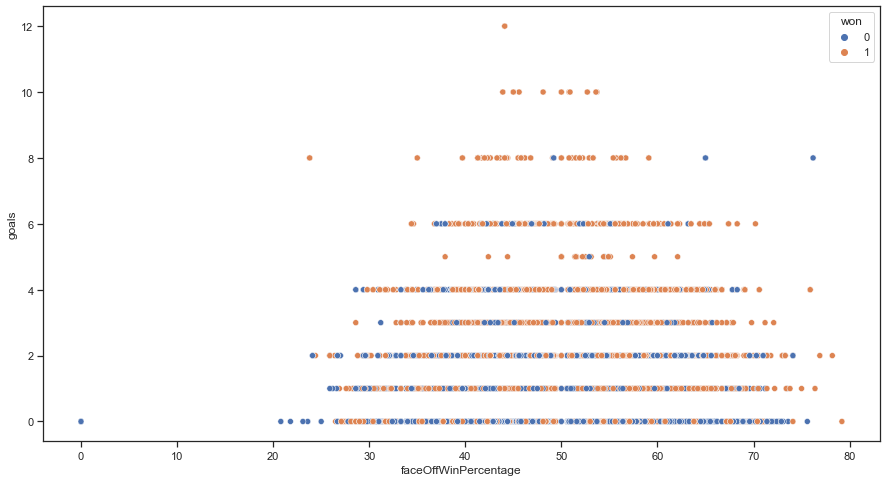

In [41]:
# examine faceoffpercentage and winning a game. 


plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x = 'faceOffWinPercentage', y="goals", hue = 'won', palette="deep")


## Insight:

* The relationship between faceoffpercentage and winning a game has become the latest topic in NHL-Stats because the relationship may not be straightforward. From our analysis, it observed that faceoffpercentage around 45-50% is a competitive position for team to win a game .

# 2.6 Data Clean up
Drop the features that are not usefull for the model.

In [42]:
df.columns

Index(['gameID', 'hoa', 'won', 'settledIn', 'headCoach', 'pim',
       'powerPlayOpportunities', 'powerPlayGoals', 'faceOffWinPercentage',
       'startRinkSide', 'shots', 'goals', 'takeaways', 'hits', 'blockedShots',
       'giveaways', 'missedShots', 'penalties', 'wonFaceoffs', 'teamID',
       'timeOnIce', 'evenTimeOnIce', 'shortHandedTimeOnIce',
       'powerPlayTimeOnIce', 'goalieReplacement'],
      dtype='object')

In [43]:
df.drop(['gameID', 'teamID','headCoach'],
        axis=1,
        inplace=True)

In [44]:
df.columns

Index(['hoa', 'won', 'settledIn', 'pim', 'powerPlayOpportunities',
       'powerPlayGoals', 'faceOffWinPercentage', 'startRinkSide', 'shots',
       'goals', 'takeaways', 'hits', 'blockedShots', 'giveaways',
       'missedShots', 'penalties', 'wonFaceoffs', 'timeOnIce', 'evenTimeOnIce',
       'shortHandedTimeOnIce', 'powerPlayTimeOnIce', 'goalieReplacement'],
      dtype='object')

In [45]:
# remove correlated variables

df.drop(['powerPlayOpportunities',"wonFaceoffs"], axis=1, inplace=True)

In [46]:
df.shape

(52610, 20)

## Categorical Encodings
one-hot encoding is used for categorical encoding. There is no need to use label encoding because there is no ordinal variables in the dataset.

In [47]:
df.select_dtypes('object').apply(pd.Series.nunique, axis=0)

hoa                  2
settledIn            3
startRinkSide        2
goalieReplacement    2
dtype: int64

In [48]:
df = pd.get_dummies(df, columns=['hoa','settledIn', 'startRinkSide','goalieReplacement'])


print(df.shape)



(52610, 25)


In [49]:
df.head(6)

,won,pim,powerPlayGoals,faceOffWinPercentage,shots,goals,takeaways,hits,blockedShots,giveaways,...,powerPlayTimeOnIce,hoa_away,hoa_home,settledIn_OT,settledIn_REG,settledIn_tbc,startRinkSide_left,startRinkSide_right,goalieReplacement_No,goalieReplacement_Yes
0,0,2.00,0.67,50.9,8.0,0.0,1.0,14.0,3.0,6.0,...,31.30,1,0,0,1,0,1,0,0,1
1,1,2.67,0.67,49.1,8.0,3.0,3.0,5.0,3.0,7.0,...,23.15,0,1,0,1,0,1,0,1,0
2,1,2.00,0.33,43.8,11.0,0.0,0.0,4.0,6.0,2.0,...,31.39,1,0,1,0,0,0,1,1,0
3,0,2.67,0.33,56.2,12.0,1.0,2.0,4.0,8.0,0.0,...,11.85,0,1,1,0,0,0,1,1,0
4,1,3.00,0.33,45.7,9.0,0.0,3.0,4.0,7.0,7.0,...,29.54,1,0,0,1,0,1,0,1,0
5,0,3.67,0.00,54.3,8.0,1.0,2.0,5.0,1.0,5.0,...,22.22,0,1,0,1,0,1,0,1,0


## Outliers check

Text(0, 0.5, 'Values')

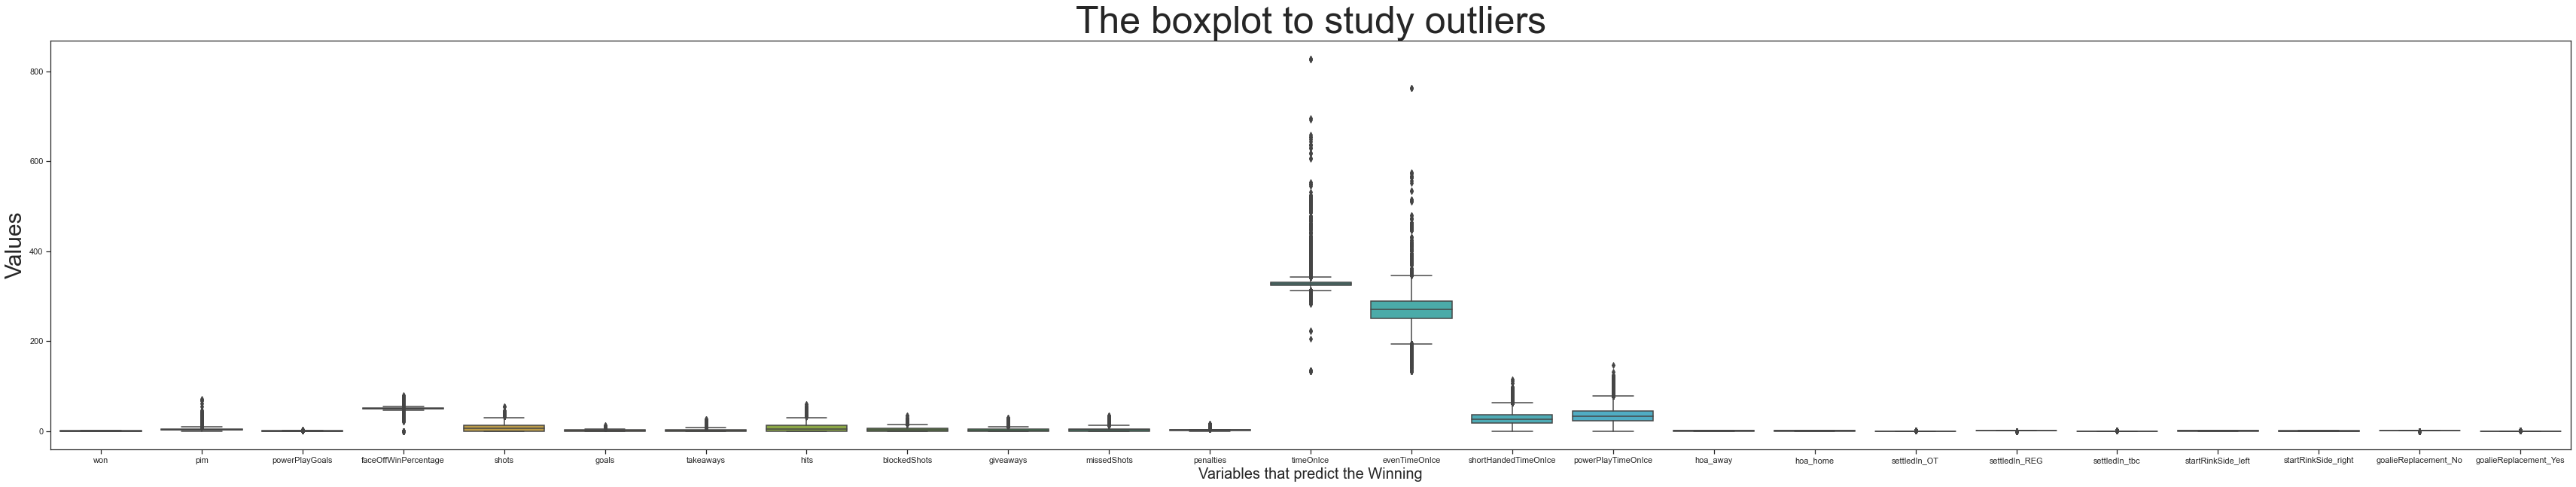

In [50]:
# outliers check

plt.figure(figsize=(60,10))
sns.boxplot(data=df)
plt.title('The boxplot to study outliers',fontsize=50)
plt.xlabel('Variables that predict the Winning',fontsize=20)
plt.ylabel('Values',fontsize=30)

### most outlier variables located in the  "timeOnIce","evenTimeOnice"

In [51]:
from sklearn.ensemble import IsolationForest # Return the anomaly score 

iforest = IsolationForest(n_estimators=100, random_state=42, contamination=0.02)
pred = iforest.fit_predict(df)
score = iforest.decision_function(df)

from numpy import where
anom_index = where(pred== -1)
values = df.iloc[anom_index]
values

,won,pim,powerPlayGoals,faceOffWinPercentage,shots,goals,takeaways,hits,blockedShots,giveaways,...,powerPlayTimeOnIce,hoa_away,hoa_home,settledIn_OT,settledIn_REG,settledIn_tbc,startRinkSide_left,startRinkSide_right,goalieReplacement_No,goalieReplacement_Yes
122,1,1.33,0.00,41.5,6.0,1.0,1.0,6.0,5.0,6.0,...,34.22,0,1,1,0,0,1,0,0,1
223,0,7.67,0.33,58.5,15.0,1.0,5.0,6.0,3.0,4.0,...,34.17,0,1,1,0,0,1,0,0,1
274,1,25.00,0.33,60.9,15.0,2.0,3.0,16.0,7.0,5.0,...,30.22,0,1,0,1,0,1,0,0,1
457,1,2.00,0.33,58.1,13.0,0.0,0.0,18.0,4.0,2.0,...,25.19,1,0,1,0,0,1,0,0,1
719,1,13.33,0.67,71.8,14.0,2.0,1.0,9.0,2.0,1.0,...,37.44,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52565,0,0.67,0.33,52.3,8.0,0.0,6.0,44.0,22.0,6.0,...,5.56,0,1,1,0,0,0,1,1,0
52590,1,5.33,1.33,55.6,18.0,6.0,6.0,32.0,8.0,0.0,...,11.67,1,0,0,1,0,0,1,1,0
52591,0,4.67,0.33,44.4,16.0,0.0,10.0,28.0,4.0,8.0,...,43.46,0,1,0,1,0,0,1,0,1
52592,1,5.33,1.33,55.6,18.0,6.0,6.0,32.0,8.0,0.0,...,11.67,1,0,0,1,0,0,1,1,0


In [52]:
# there were 1053 outiliers detected

values.shape

(1053, 25)

In [53]:
# the remove the outliers detected

df = df[~df.index.isin(values.index)]
df.shape

(51557, 25)

## 2.7 Feature Selection

####  2.7.1 Random Forest

In [54]:
from sklearn.model_selection import train_test_split
# define x and y

X, y = df.drop(['won'], axis=1), df.won

# split the data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)




In [55]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(random_state=0)

model = randomforest.fit(X_train,y_train)

model.feature_importances_

pd.DataFrame(list(zip(X_train.columns,model.feature_importances_)), columns = ['predictor','feature importance']).sort_values("feature importance")

,predictor,feature importance
19,settledIn_tbc,0.000099
16,hoa_home,0.006908
15,hoa_away,0.007306
18,settledIn_REG,0.009453
17,settledIn_OT,0.009570
21,startRinkSide_right,0.010467
20,startRinkSide_left,0.010479
23,goalieReplacement_Yes,0.019254
22,goalieReplacement_No,0.019889
5,takeaways,0.024407


### 2.7.2 Feature Importances with Yellow Bricks

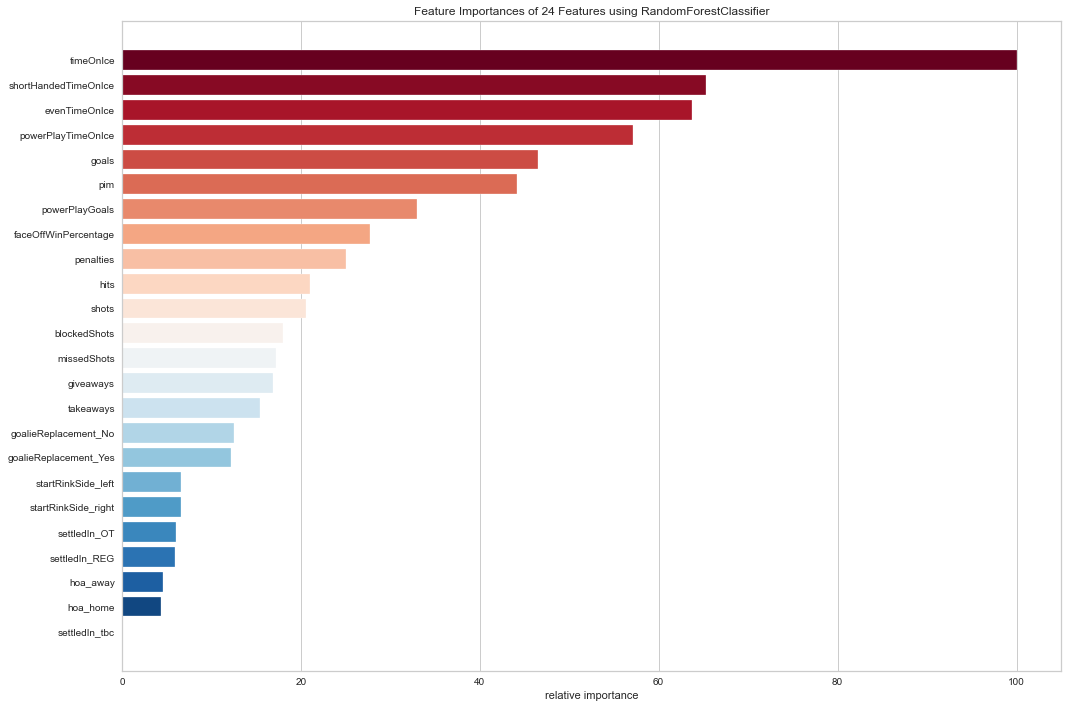

<AxesSubplot:title={'center':'Feature Importances of 24 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [56]:
# determine and visualize the feature importances
from yellowbrick.model_selection import FeatureImportances

fig = plt.figure(figsize=(15, 10))
viz = FeatureImportances(randomforest, labels=X_train.columns, colormap='RdBu_r', rotation=180)
viz.fit(X_train, y_train)
viz.poof()

##  Insights:

the least important predictor should be removed

* **settledIn_tbc**




In [57]:
X_train = X_train.drop(['settledIn_tbc'], axis=1)

X_test= X_test.drop(['settledIn_tbc'], axis=1)


In [58]:
df.columns

Index(['won', 'pim', 'powerPlayGoals', 'faceOffWinPercentage', 'shots',
       'goals', 'takeaways', 'hits', 'blockedShots', 'giveaways',
       'missedShots', 'penalties', 'timeOnIce', 'evenTimeOnIce',
       'shortHandedTimeOnIce', 'powerPlayTimeOnIce', 'hoa_away', 'hoa_home',
       'settledIn_OT', 'settledIn_REG', 'settledIn_tbc', 'startRinkSide_left',
       'startRinkSide_right', 'goalieReplacement_No', 'goalieReplacement_Yes'],
      dtype='object')

In [59]:
df= df.drop(['settledIn_tbc'], axis=1)




In [60]:
df.head()

,won,pim,powerPlayGoals,faceOffWinPercentage,shots,goals,takeaways,hits,blockedShots,giveaways,...,shortHandedTimeOnIce,powerPlayTimeOnIce,hoa_away,hoa_home,settledIn_OT,settledIn_REG,startRinkSide_left,startRinkSide_right,goalieReplacement_No,goalieReplacement_Yes
0,0,2.00,0.67,50.9,8.0,0.0,1.0,14.0,3.0,6.0,...,18.52,31.30,1,0,0,1,1,0,0,1
1,1,2.67,0.67,49.1,8.0,3.0,3.0,5.0,3.0,7.0,...,25.04,23.15,0,1,0,1,1,0,1,0
2,1,2.00,0.33,43.8,11.0,0.0,0.0,4.0,6.0,2.0,...,9.48,31.39,1,0,1,0,0,1,1,0
3,0,2.67,0.33,56.2,12.0,1.0,2.0,4.0,8.0,0.0,...,25.11,11.85,0,1,1,0,0,1,1,0
4,1,3.00,0.33,45.7,9.0,0.0,3.0,4.0,7.0,7.0,...,17.78,29.54,1,0,0,1,1,0,1,0


In [61]:
df= df.round({"powerPlayGoals":0})

In [62]:
df.head()

,won,pim,powerPlayGoals,faceOffWinPercentage,shots,goals,takeaways,hits,blockedShots,giveaways,...,shortHandedTimeOnIce,powerPlayTimeOnIce,hoa_away,hoa_home,settledIn_OT,settledIn_REG,startRinkSide_left,startRinkSide_right,goalieReplacement_No,goalieReplacement_Yes
0,0,2.00,1.0,50.9,8.0,0.0,1.0,14.0,3.0,6.0,...,18.52,31.30,1,0,0,1,1,0,0,1
1,1,2.67,1.0,49.1,8.0,3.0,3.0,5.0,3.0,7.0,...,25.04,23.15,0,1,0,1,1,0,1,0
2,1,2.00,0.0,43.8,11.0,0.0,0.0,4.0,6.0,2.0,...,9.48,31.39,1,0,1,0,0,1,1,0
3,0,2.67,0.0,56.2,12.0,1.0,2.0,4.0,8.0,0.0,...,25.11,11.85,0,1,1,0,0,1,1,0
4,1,3.00,0.0,45.7,9.0,0.0,3.0,4.0,7.0,7.0,...,17.78,29.54,1,0,0,1,1,0,1,0


In [63]:
# export the dataset for modelling

#df.to_csv("readyformodel_V2.1.csv", index= False)